<h1>Udacity Capstone Project</h1>


This investigation hopes to use the Kaggle dataset to investigate social and economic aspects of student's lives and see if their final grades can be predicted based on these.

<h2> Investigating Dataset</h2>
Within this dataset, there are two csv files. Each file represents a different class, one being a maths class, the other being Portuguese. The file names are 

1. student-mat.csv

2. student-por.csv

Both files have the same columns so we can have a sneak peak at this below

In [1]:
import pandas as pd
maths = pd.read_csv('student-mat.csv') 
portug = pd.read_csv('student-por.csv')

print(maths.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [2]:
sample = maths.loc[0,:]
print(sample)

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
Name: 0, dtype: object


We can see we have two files with 33 columns however the meanings of the eery columns are not overly clear from looking at one row of the dataset. Below we have a full mapping of the columns with a more clear explanation.

<h3> File Schemas </h3>

<ul>
    <li>school: Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>

<li>sex:Student's sex (binary: 'F' - female or 'M' - male)</li>

<li>age: Student's age (numeric: from 15 to 22)</li>

<li>address: Student's home address type (binary: 'U' - urban or 'R' - rural)</li>

<li>famsize: Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>

<li>Pstatus: Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)</li>

<li>Medu: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)</li>

<li>Fedu: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)</li>

<li>Mjob: Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>

<li>Fjob: Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>

<li>reason: Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>

<li>guardian: Student's guardian (nominal: 'mother', 'father' or 'other')</li>

<li>traveltime: Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>

<li>studytime: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>

<li>failures: Number of past class failures (numeric: n if 1<=n<3, else 4)</li>

<li>schoolsup:Extra educational support (binary: yes or no)</li>

<li>famsup: Family educational support (binary: yes or no)</li>

<li>paid: Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>

<li>activities: Extra-curricular activities (binary: yes or no)</li>

<li>nursery: Attended nursery school (binary: yes or no)</li>

<li>higher" Wants to take higher education (binary: yes or no)</li>

<li>internet: Internet access at home (binary: yes or no)</li>

<li>romantic: With a romantic relationship (binary: yes or no)</li>

<li>famrel: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>

<li>freetime: Free time after school (numeric: from 1 - very low to 5 - very high)</li>

<li>goout: Going out with friends (numeric: from 1 - very low to 5 - very high)</li>

<li>Dalc: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>

<li>Walc: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>

<li>health: Current health status (numeric: from 1 - very bad to 5 - very good)</li>

<li>absences: Number of school absences (numeric: from 0 to 93)</li>

<li>G1: First period grade (numeric: from 0 to 20)</li>

<li>G2: Second period grade (numeric: from 0 to 20)</li>

<li>G3: Final grade (numeric: from 0 to 20, output target)</li>
</ul>

<h3>Joining Datasets together</h3>
For the rest of this notebook we will combine the datasets for the two classes together and work on one combined dataset and investigate the features in the dataset

In [3]:
totalDataSet = pd.concat([maths,portug])

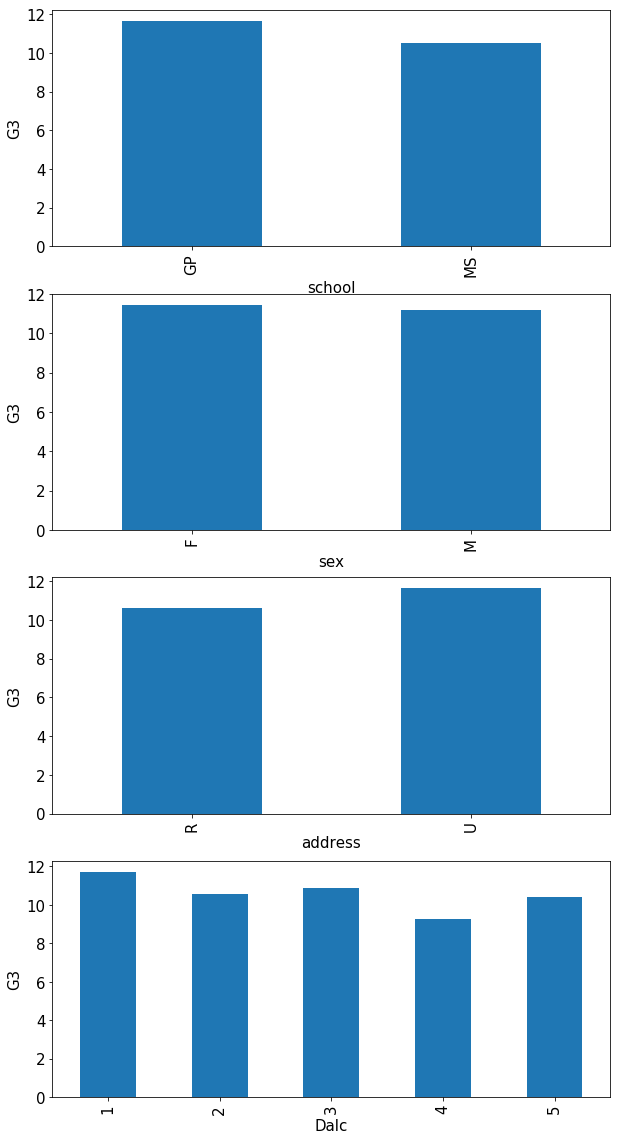

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
lst = ['school','sex','address','Dalc']
fig = plt.figure(figsize=(10, 20))
plt.rcParams.update({'font.size': 15})

for x,y in enumerate(lst):
    plt.subplot(len(lst),1,1+x) 
    plt.xlabel(y)
    plt.ylabel("G3")
    totalDataSet.groupby(y)['G3'].mean().plot(kind='bar')


The above code allows us to dynamically look at different attributes and let us have an insight into how they might affect the final grade. For example we can see that there is little difference in final grades between males and females. However we can see that the GP school seems to have a better average score than MS. One other tool which might give us a better insight would be a heat map. 

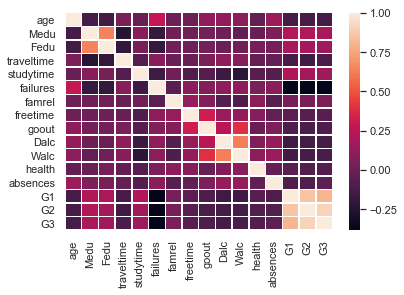

In [5]:
import seaborn as sns
sns.set()
sns.heatmap(totalDataSet.corr(),linewidths=.5)

The heat map shows the correlation between each feature in the dataset. It can be seen how there are extremely high correlations between the final grades and the grades given in first and second perion. The next features which seem to be most correlated are the level of education which the student's parents have attained.

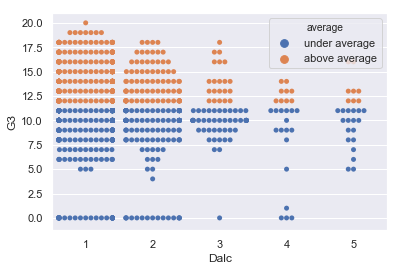

In [6]:
ave = sum(totalDataSet.G3)/float(len(totalDataSet))
totalDataSet['average'] = ['above average' if i > ave else 'under average' for i in totalDataSet.G3]
sns.swarmplot(x=totalDataSet.Dalc, y =totalDataSet.G3, hue = totalDataSet.average)
totalDataSet.drop('average',axis=1);

Text(0, 0.5, 'Number of Students')

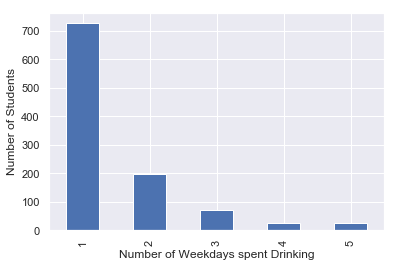

In [7]:
ax2 = pd.value_counts(totalDataSet['Dalc']).sort_values(ascending=False).plot.bar()
ax2.set_xlabel('Number of Weekdays spent Drinking')
ax2.set_ylabel('Number of Students')

We can see the number of students that drink on a weekday drops dramatically after 1. This is a good sign as it can be seen from the scatter plot that the number of below average students seem to outweigh the number of above average as the student drinks more and more during the week

# Data PreProcessing
We will look at the dataset and investigate some preprocessing techniques and see which ones will be most appropriate for the data. 

First we will separate the feature we are trying to predict, G3, with the rest of the features. In order to make this a bit more challenging for the algorithms we will also drop G2 and G1. It will be interesting to see if final grades can be predicted without these intermediate grades.

In [8]:
outcomes = totalDataSet['G3']
features_raw = totalDataSet.drop(['G3','G2','G1'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EB27DC4A8>,
      dtype=object)

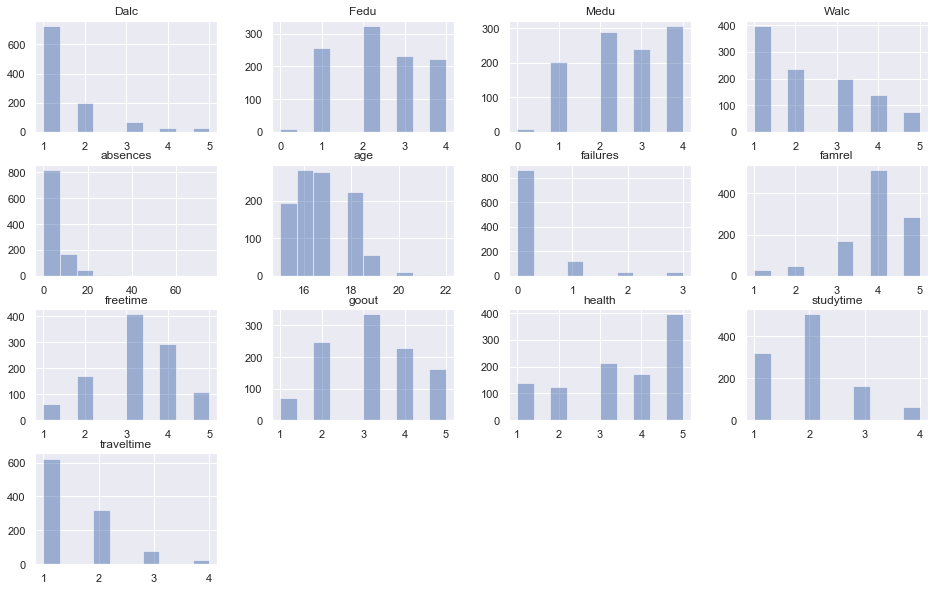

In [9]:
features_raw.hist(alpha=0.5, figsize=(16, 10))

We can see there are a few features which seem to have a skewed distribution. For example 
    1. Dalc
    2. absences
    3. failures
    4. traveltime
These are some good choices which could use a logarithimic distribution applied to them

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EB2B0B0B8>,
      dtype=object)

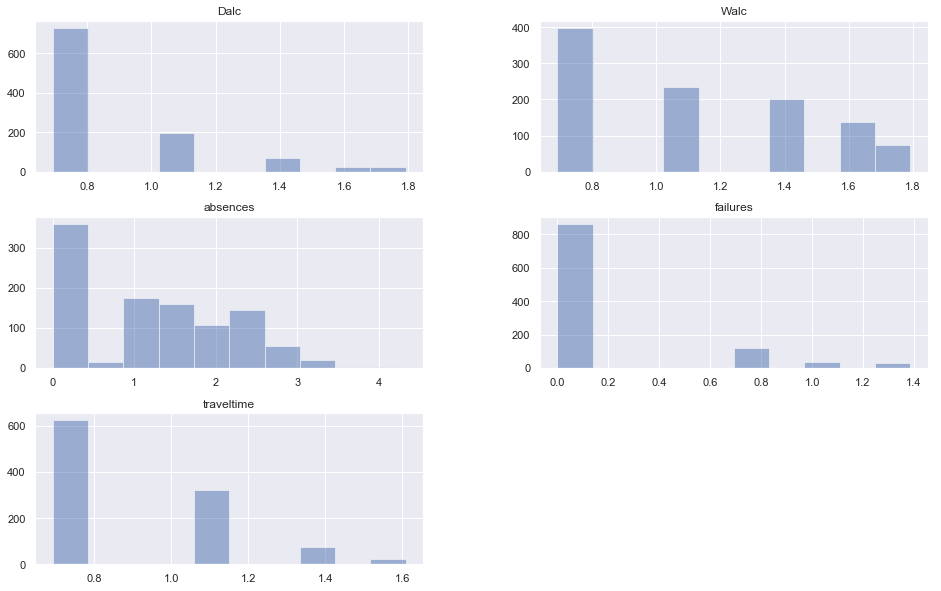

In [10]:
skewed=['Dalc','Walc','absences','failures','traveltime']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x:np.log(x+1))

features_log_transformed[skewed].hist(alpha=0.5, figsize=(16, 10))

## Normalizing Numerical Features
It is also good practice to perform some scaling on numerical features. This will ensure that each feature is treated equally when performing supervised learning algortihms on the data.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n=5))

C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,average
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,...,no,no,0.75,0.50,0.75,0.00000,0.00000,0.5,0.449326,under average
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,...,yes,no,1.00,0.50,0.50,0.00000,0.00000,0.5,0.371632,under average
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,...,yes,no,0.75,0.50,0.25,0.36907,0.63093,0.5,0.553693,under average
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,...,yes,yes,0.50,0.25,0.25,0.00000,0.00000,1.0,0.253678,above average
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,...,no,no,0.75,0.50,0.25,0.00000,0.36907,1.0,0.371632,under average


Even though most of the numerical feature were already within a range of 1-5 it was good to scale all features so they can be on the same range

## One Hot Encoding
Most algorithms expect numerical values to process. However it can be clearly seen that there are non numerical features. Pandas can be used to encode these to numerical values

In [12]:
features_final = pd.get_dummies(features_log_minmax_transform)
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

58 total features after one-hot encoding
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'average_above average', 'average_under average']


## Training the model
Finally we can start getting to the good stuff
We obviously can't train the model on the whole dataset so we will use SkLearns cross validation implementation to split the data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_final,outcomes, test_size = 0.2, random_state=42)

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 835 samples
Testing set has 209 samples


## Base Model
Linear Regression will be used as a benchmark model and we will use other algorithms in an attempt to outperform this

### Linear Regression
Training and Testing the model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now to test the model and see how it performed!

In [15]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

train_rms = sqrt(mean_squared_error(y_train, y_train_pred))
test_rms = sqrt(mean_squared_error(y_test, y_test_pred))


print("The Root mean Squared Error for the training set is", train_rms)
print("The Root mean Squared Error for the testing set is ", test_rms)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error for Training Set: %f' % mae_train)
print('Mean Absolute Error for Testing Set: %f' % mae_test)

print("Cross val score for training set",cross_val_score(model, X_train, y_train, cv=5).mean())
print("Cross val score for testing set",cross_val_score(model, X_test, y_test, cv=5).mean())

The Root mean Squared Error for the training set is 2.429927397205238
The Root mean Squared Error for the testing set is  2.703264794695339
Mean Absolute Error for Training Set: 1.809731
Mean Absolute Error for Testing Set: 1.934809
Cross val score for training set 0.5522293365522914
Cross val score for testing set 0.401170235013571


These results suggest that a students grade can be predicted with approximately an error of 1.8-1.9 away from the actual grade which gives us a margin of Error of about 10-40% margin of Error. This is quite a large swing for an error but for the larger error it is still quite close to the actualy score, the error is just relative and shows that the algorithm performs admirably when predicting results 

## Testing other algorithms
In this section we will test out some other algorithms. Once we have found what is believed to be the optimal solution, a grid search will be used on the hyper parameters in the hope that the optimal solution will be found
The algorithms to be tested will include

    1.XgBoost
    
    2.LightGBM
    
    3.SVM
    
We can create a function to help reduce the code needed 

In [16]:
def model_Creator_Tester(name,model,X_train,X_test,y_train,y_test):
    print(name)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error

    train_rms = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rms = sqrt(mean_squared_error(y_test, y_test_pred))


    print("The Root mean Squared Error for the training set is", train_rms)
    print("The Root mean Squared Error for the testing set is ", test_rms)


    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print('Mean Absolute Error for Training Set: %f' % mae_train)
    print('Mean Absolute Error for Testing Set: %f' % mae_test)
    return train_rms,test_rms,mae_train,mae_test;
    #print("Cross val score for training set",cross_val_score(model, X_train, y_train, cv=5).mean())
    #print("Cross val score for testing set",cross_val_score(model, X_test, y_test, cv=5).mean())

In [17]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
names = ["Linear_Regression","XGB","SVM","LGB"]
models = [LinearRegression(),XGBClassifier(),SVC(gamma='auto'),lgb.LGBMRegressor()]
results = {}
for x,y in zip(names,models):
    print("\n",y,"\n")
    results[x]=model_Creator_Tester(x,y,X_train,X_test,y_train,y_test)


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

Linear_Regression
The Root mean Squared Error for the training set is 2.429927397205238
The Root mean Squared Error for the testing set is  2.703264794695339
Mean Absolute Error for Training Set: 1.809731
Mean Absolute Error for Testing Set: 1.934809

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

XGB
The Root mean Squared Error for the training set is 1.5645779595842344
The Root mean Squared Error for the testing set is  3.1554615825649126
Mean Absolute Error for Training Set: 0.632335
Mean Absolute Error for Testing

In [18]:
def color_gradient ( val, beg_rgb, end_rgb, val_min = 0, val_max = 1):
    val_scale = (1.0 * val - val_min) / (val_max - val_min)
    return ( beg_rgb[0] + val_scale * (end_rgb[0] - beg_rgb[0]),
             beg_rgb[1] + val_scale * (end_rgb[1] - beg_rgb[1]),
             beg_rgb[2] + val_scale * (end_rgb[2] - beg_rgb[2]))

In [20]:
#print(results)
def print_results(results):
    titles = ["Root Mean Square for Training Set","Root Mean Square for Testing Set","Mean Absolute Error for Training Set","Mean Absolute Error for Testing Set"]
    fig = plt.figure(figsize=(10, 10))
    plt.rcParams.update({'font.size': 10})
    grad_beg, grad_end = ( 0.1, 0.1, 0.1), (1, 1, 0)
    for i,k in enumerate(results):
        tempVals = []
        for j in results.keys():
            #print(i,j)
            #print(results[j][i])
            tempVals.append(results[j][i])
        print(tempVals)
        print(results.keys())
        plt.subplot(len(titles)/2.,len(titles)/2.,1+i)
        col_list = [ color_gradient( val,
                                 grad_beg,
                                 grad_end,
                                 min( tempVals),
                                 max(tempVals)) for val in tempVals]

        plt.bar(results.keys(),tempVals,color = col_list)
        plt.title(titles[i])


[2.429927397205238, 1.5645779595842344, 3.1222592771920743, 1.0035734162021]
dict_keys(['Linear_Regression', 'XGB', 'SVM', 'LGB'])
[2.703264794695339, 3.1554615825649126, 3.2934616973866735, 2.497215324098614]
dict_keys(['Linear_Regression', 'XGB', 'SVM', 'LGB'])
[1.8097305389221556, 0.6323353293413174, 1.8682634730538923, 0.7371768321539263]
dict_keys(['Linear_Regression', 'XGB', 'SVM', 'LGB'])
[1.9348086124401913, 1.9473684210526316, 2.138755980861244, 1.7486518984878612]
dict_keys(['Linear_Regression', 'XGB', 'SVM', 'LGB'])


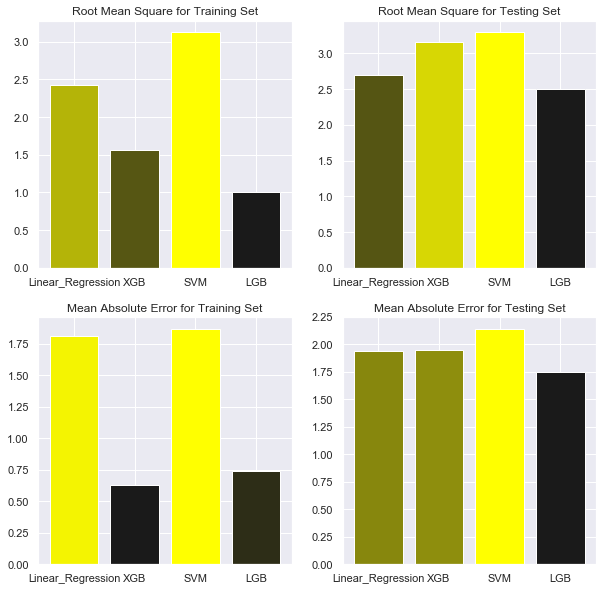

In [21]:
print_results(results)

The results here are quite interesting. The darkest bars have the lowest errors, which seems to be LGB in every scenario except for MAE on the training set. In this case XGB seems to outperform LGB. It could be said that may have overfitted the training set. It seems to be that Support Vector Machine is the worst performing algorithm on this dataset

## Optimising Hyper Paramaters
In the results we have seen above this is using the most vanilla of algortihms. The next stage of this is to use GridSearch to try and optimise the hyperparamaters for each algorithm and see how much more we can improve performance

In [1]:
from sklearn.model_selection import GridSearchCV
params={'Linear_Regression':{'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]},
        'XGB':{},}
#        'SVM':{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1],'kernel':['rbf','linear']},
#       'LGB':{'boosting_type': ['gbdt', 'goss', 'dart'],
#                'num_leaves': [20,50,80,110,140],
#                'learning_rate': [0.05,0.1,0.25,0.5,0.8],
#                'subsample_for_bin': [10,100,500],
#                'min_child_samples': [20,50,100],
#                'reg_alpha': [0.05,0.1,0.25,0.5,0.8],
#                'reg_lambda': [0.05,0.1,0.25,0.5,0.8],
#                'colsample_bytree': [1,2,5,8],
#                'subsample': [1,5,10,25,50,100],
#                'is_unbalance': [True, False]}
#       }

names = ["Linear_Regression","XGB"]
#,"SVM","LGB"]
models = [LinearRegression(),XGBClassifier(),SVC(),lgb.LGBMRegressor()]


NameError: name 'LinearRegression' is not defined

In [ ]:
def grid_model_Creator_Tester(name,model,X_train,X_test,y_train,y_test):
    print(name)
    model.fit(X_train,y_train)
    best_model = model.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error

    train_rms = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rms = sqrt(mean_squared_error(y_test, y_test_pred))


    print("The Root mean Squared Error for the training set is", train_rms)
    print("The Root mean Squared Error for the testing set is ", test_rms)


    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print('Mean Absolute Error for Training Set: %f' % mae_train)
    print('Mean Absolute Error for Testing Set: %f' % mae_test)
    return train_rms,test_rms,mae_train,mae_test;

In [ ]:
results = {}
for x,y in zip(names,models):
    print("\n",y,"\n")
    results[x]=model_Creator_Tester(x,GridSearchCV(y,params[x]),X_train,X_test,y_train,y_test)
print_results(results)


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

Linear_Regression
The Root mean Squared Error for the training set is 2.4152657246821283
The Root mean Squared Error for the testing set is  2.6587340773745582
Mean Absolute Error for Training Set: 1.797084
Mean Absolute Error for Testing Set: 1.900778

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

XGB


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


The Root mean Squared Error for the training set is 1.5645779595842344
The Root mean Squared Error for the testing set is  3.1554615825649126
Mean Absolute Error for Training Set: 0.632335
Mean Absolute Error for Testing Set: 1.947368

 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 

SVM


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
